# Spam Detection with a Neural Network (MLP)

In this notebook we build a simple **spam vs ham** text classifier using:

- A **spam.csv** dataset
- **TF–IDF** text features
- A **Multilayer Perceptron (MLP)** classifier

We will load the data, vectorise the text, train the model, and evaluate its performance.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# File path and column names (change here if needed)
CSV_PATH = "spam.csv"
LABEL_COL = "v1"   # e.g. 'v1' = ham/spam
TEXT_COL = "v2"    # e.g. 'v2' = message text

RANDOM_STATE = 42
%matplotlib inline


## 1. Load and inspect the dataset

We load `spam.csv`, check the first few rows and the column names.


In [4]:
df = pd.read_csv(CSV_PATH, encoding="latin-1")

print("Shape:", df.shape)
display(df.head())
print("Columns:", list(df.columns))


Shape: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Columns: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


## 2. Select text and label columns

We keep only the text message and its label, drop missing values, and look at class balance.


Shape after selecting columns: (5572, 2)

Class distribution:
v1
ham     4825
spam     747
Name: count, dtype: int64


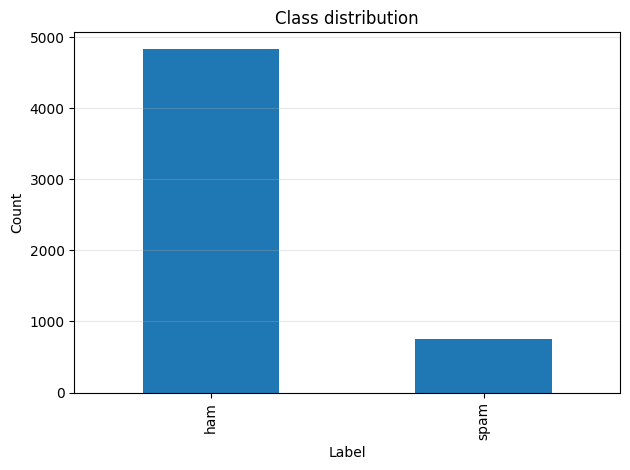

In [5]:
# Keep only the columns we need
df = df[[LABEL_COL, TEXT_COL]].dropna()
df[TEXT_COL] = df[TEXT_COL].astype(str)

print("Shape after selecting columns:", df.shape)

print("\nClass distribution:")
print(df[LABEL_COL].value_counts())

df[LABEL_COL].value_counts().plot(kind="bar")
plt.title("Class distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


## 3. Train–test split

We split the data into training and test sets (80% / 20%), stratified by label.


In [6]:
X = df[TEXT_COL]
y = df[LABEL_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 4457
Test size: 1115


## 4. TF–IDF + MLP pipeline

We use a scikit-learn `Pipeline` to:

1. Convert text to numeric features using **TF–IDF**
2. Train an **MLPClassifier** with one hidden layer


In [7]:
mlp_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        lowercase=True,
        stop_words="english",
        max_features=5000
    )),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(64,),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        max_iter=20,          # increase if needed
        random_state=RANDOM_STATE
    ))
])

print("Pipeline created.")


Pipeline created.


## 5. Train the MLP model

We fit the pipeline on the training data.


In [8]:
print("Training MLP...")
mlp_pipeline.fit(X_train, y_train)
print("Training done.")


Training MLP...
Training done.


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


## 6. Evaluate the model

We evaluate the model using:

- Accuracy on the test set
- Precision, recall, F1-score
- Confusion matrix


Test accuracy: 0.9857

Classification report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Confusion matrix:
 [[965   1]
 [ 15 134]]


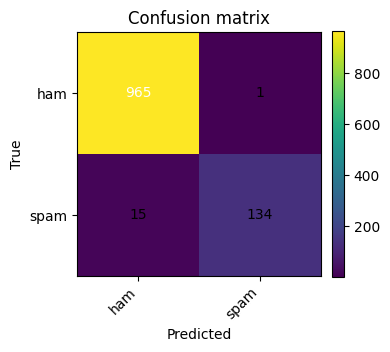

In [9]:
y_pred = mlp_pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred))

labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
print("Confusion matrix:\n", cm)

fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(cm)

ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_yticklabels(labels)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion matrix")

for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, cm[i, j],
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2 else "black")

plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()
